In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### AIR POLUTION DATA


In [2]:

myFile = "air_pollution.xlsx"
airPol = pd.read_excel(myFile, decimal=".")
airPol.shape


(3288, 82)

In [3]:
airPol.head()

,Tarih,Adana - Meteoroloji,Adıyaman,Afyon-Selçuk Cami,Ağrı,Aksaray,Amasya,Ankara - Sincan,Antalya,Ardahan,...,Şırnak,Tekirdağ,Tokat,Trabzon - Valilik,Tunceli,Uşak-Trafik (Yeni),Van,Yalova,Yozgat,Zonguldak - Trafik
0,NaN,PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),...,PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 ),PM10 ( µg/m3 )
1,2009.0,49.81,66.46,150.25,42.56,0,47.68,0,104.55,41.74,...,0,88.01,60.36,47.83,0,0,42.52,38.47,79.38,110.96
2,2009.0,0,90.47,472.27,0,0,50.9,0,0,108.9,...,0,72.37,81.24,77.06,0,0,83.1,25.12,70.83,174.4
3,2009.0,0,103.06,470.83,0,0,74.91,0,135.03,175.24,...,0,71.71,79.82,123.69,0,0,129.71,26.83,32.24,170.05
4,2009.0,0,67.06,272.57,0,0,134.03,0,70.96,217.74,...,0,72.12,113.34,90.46,0,0,137.51,32.19,22.72,0


In [5]:
airPol.iloc[1,0] ==2009
float("54.5")

54.5

yıllara göre TR deki tüm illerdeki air pollutionlar: 


In [6]:
##2009 daki tum illerdeki veriler 
pollution_by_Year= {
    "year" :["2009", "2010", "2011" , "2012", "2013" , "2014"  , "2015", "2016", "2017"],
    "pollution" : [0,0,0,0,0,0,0,0,0],
     }
df = pd.DataFrame(pollution_by_Year)
for i in range(1,3288):
  temp = pollution_by_Year['pollution']
  for j in range(1,82):
    if(airPol.iloc[i,0] == 2009):
      temp[0] += (float(airPol.iloc[i,j]) /365)       
    if(airPol.iloc[i,0] == 2010):
      temp[1] += (float(airPol.iloc[i,j]) /365)       
    if(airPol.iloc[i,0] == 2011):
      temp[2] += (float(airPol.iloc[i,j]) /365)           
    if(airPol.iloc[i,0] == 2012):
      temp[3] += (float(airPol.iloc[i,j]) /365)        
    if(airPol.iloc[i,0] == 2013):
      temp[4] += (float(airPol.iloc[i,j]) /365)       
    if(airPol.iloc[i,0] == 2014):
      temp[5] += (float(airPol.iloc[i,j]) /365)       
    if(airPol.iloc[i,0] == 2015):
      temp[6] += (float(airPol.iloc[i,j]) /365)       
    if(airPol.iloc[i,0] == 2016):
      temp[7] += (float(airPol.iloc[i,j]) /365)   
    if(airPol.iloc[i,0] == 2017):
      temp[8] += (float(airPol.iloc[i,j]) /365) 

      
    df["pollution"] = temp        

In [7]:
df.head()

,year,pollution
0,2009,4289.223918
1,2010,5017.441425
2,2011,4277.932356
3,2012,4067.265479
4,2013,4358.940740


In [8]:
df["pollution"].value_counts().nlargest(10)     #burda baska teknikler de kullanilabilir yillar kiyaslanabilir histogram vs 

pollution
4289.223918    1
5017.441425    1
4277.932356    1
4067.265479    1
4358.940740    1
4070.139589    1
4201.102685    1
4013.349507    1
4125.274575    1
Name: count, dtype: int64

In [9]:
df.describe() ##tekrardan istatistikler farki yöntemlerel gösterilebilr 

,pollution
count,9.000000
mean,4268.963364
std,304.057803
min,4013.349507
25%,4070.139589
50%,4201.102685
75%,4289.223918
max,5017.441425


In [10]:
# totalde bir ilde  pm 10 degeri her index sirasi ile bir ili temsil eder 
pollution_by_city= {
    "cities" : [ 'Adana', 'Adıyaman', 'Afyonkarahisar', 'Ağrı', 'Amasya', 'Ankara', 'Antalya', 'Artvin', 'Aydın', 'Balıkesir', 'Bilecik', 'Bingöl', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Çanakkale', 'Çankırı', 'Çorum', 'Denizli', 'Diyarbakır', 'Edirne', 'Elazığ', 'Erzincan', 'Erzurum', 'Eskişehir', 'Gaziantep', 'Giresun', 'Gümüşhane', 'Hakkari', 'Hatay', 'Isparta', 'Mersin', 'İstanbul', 'İzmir', 'Kars', 'Kastamonu', 'Kayseri', 'Kırklareli', 'Kırşehir', 'Kocaeli', 'Konya', 'Kütahya', 'Malatya', 'Manisa', 'Kahramanmaraş', 'Mardin', 'Muğla', 'Muş', 'Nevşehir', 'Niğde', 'Ordu', 'Rize', 'Sakarya', 'Samsun', 'Siirt', 'Sinop', 'Sivas', 'Tekirdağ', 'Tokat', 'Trabzon', 'Tunceli', 'Şanlıurfa', 'Uşak', 'Van', 'Yozgat', 'Zonguldak', 'Aksaray', 'Bayburt', 'Karaman', 'Kırıkkale', 'Batman', 'Şırnak', 'Bartın', 'Ardahan', 'Iğdır', 'Yalova', 'Karabük', 'Kilis', 'Osmaniye', 'Düzce'],
    "pollution":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 ]
}
df2 = pd.DataFrame(pollution_by_city)
temp = [] 
tempcity =[]
for i in range(1,82):
  tempcity = airPol.iloc[0,i]
  t = 0;
  for j in range(1,3288):
    t+= (float(airPol.iloc[j,i])/365) 
  temp.append(t)
df2['pollution'] = temp 


In [11]:
df2.head() 

,cities,pollution
0,Adana,496.898082
1,Adıyaman,581.633699
2,Afyonkarahisar,732.705041
3,Ağrı,441.948685
4,Amasya,512.022055


#DEATHS


In [12]:
myFile = "deaths.xls"
deaths = pd.read_excel(myFile)
deaths.shape


(96, 83)

In [13]:

columns = list(range(6, 84, 9))
selected_df = deaths.iloc[:, columns]
selected_df = selected_df.drop([0, 1, 2, 3, 4, 88, 89, 90, 91, 92, 93, 94, 95])

new_columns = list(range(2009, 2018))
selected_df.columns = new_columns

cities = ['Türkiye', 'Adana', 'Adıyaman', 'Afyonkarahisar', 'Ağrı', 'Amasya', 'Ankara', 'Antalya', 'Artvin', 'Aydın', 'Balıkesir', 'Bilecik', 'Bingöl', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Çanakkale', 'Çankırı', 'Çorum', 'Denizli', 'Diyarbakır', 'Edirne', 'Elazığ', 'Erzincan', 'Erzurum', 'Eskişehir', 'Gaziantep', 'Giresun', 'Gümüşhane', 'Hakkari', 'Hatay', 'Isparta', 'Mersin', 'İstanbul', 'İzmir', 'Kars', 'Kastamonu', 'Kayseri', 'Kırklareli', 'Kırşehir', 'Kocaeli', 'Konya', 'Kütahya', 'Malatya', 'Manisa', 'Kahramanmaraş', 'Mardin', 'Muğla', 'Muş', 'Nevşehir', 'Niğde', 'Ordu', 'Rize', 'Sakarya', 'Samsun', 'Siirt', 'Sinop', 'Sivas', 'Tekirdağ', 'Tokat', 'Trabzon', 'Tunceli', 'Şanlıurfa', 'Uşak', 'Van', 'Yozgat', 'Zonguldak', 'Aksaray', 'Bayburt', 'Karaman', 'Kırıkkale', 'Batman', 'Şırnak', 'Bartın', 'Ardahan', 'Iğdır', 'Yalova', 'Karabük', 'Kilis', 'Osmaniye', 'Düzce', 'Diğer']
selected_df.index = cities


selected_df.head(10)

  ##slm güzellik :3
  #slm cnm


,2009,2010,2011,2012,2013,2014,2015,2016,2017
Türkiye,24996,24418,31384,31024,35331,40593,43820,49296,50224
Adana,460,445,585,567,632,764,897,1091,1093
Adıyaman,112,131,167,161,235,236,242,332,317
Afyonkarahisar,410,416,553,566,502,580,646,650,581
Ağrı,95,75,103,89,160,208,203,207,246
Amasya,116,148,196,158,248,247,222,258,256
Ankara,1487,1443,1832,1668,1906,2122,2355,2372,2460
Antalya,412,426,542,530,617,737,858,1017,1111
Artvin,77,64,107,102,128,103,140,163,188
Aydın,458,417,596,623,659,792,827,880,928


In [38]:
populationFile = "populations.xls"
populations = pd.read_excel(populationFile)
populations.shape

(3941, 80)

In [67]:
columns_to_drop = populations.columns[4:80]
populations = populations.drop(columns_to_drop, axis=1)
selected_columns = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
allNumbers=[]
for i in range(3,3939,3):
    allNumbers.append(populations.iloc[i, 3])
index=0
population_2022=allNumbers[index:index+82]
index+=82
population_2021=allNumbers[index:index+82]
index+=82
population_2020=allNumbers[index:index+82]
index+=82
population_2019=allNumbers[index:index+82]
index+=82
population_2018=allNumbers[index:index+82]
index+=82
population_2017=allNumbers[index:index+82]
index+=82
population_2016=allNumbers[index:index+82]
index+=82
population_2015=allNumbers[index:index+82]
index+=82
population_2014=allNumbers[index:index+82]
index+=82
population_2013=allNumbers[index:index+82]
index+=82
population_2012=allNumbers[index:index+82]
index+=82
population_2011=allNumbers[index:index+82]
index+=82
population_2010=allNumbers[index:index+82]
index+=82
population_2009=allNumbers[index:index+82]

population_df=pd.DataFrame({
    '2009': population_2009,
    '2010': population_2010,
    '2011': population_2011,
    '2012': population_2012,
    '2013': population_2013,
    '2014': population_2014,
    '2015': population_2015,
    '2016': population_2016,
    '2017': population_2017
    })
population_df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,72561312,73722988,74724269,75627384,76667864,77695904,78741053,79814871,80810525
1,2062226,2085225,2108805,2125635,2149260,2165595,2183167,2201670,2216475
2,588475,590935,593931,595261,597184,597835,602774,610484,615076
3,701326,697559,698626,703948,707123,706371,709015,714523,715693
4,537665,542022,555479,552404,551177,549435,547210,542255,536285
...,...,...,...,...,...,...,...,...,...
77,202531,203741,206535,211799,220122,226514,233009,241665,251203
78,218564,227610,219728,225145,230251,231333,236978,242347,244453
79,122104,123135,124452,124320,128586,128781,130655,130825,136319
80,471804,479221,485357,492135,498981,506807,512873,522175,527724


<function matplotlib.pyplot.show(close=None, block=None)>

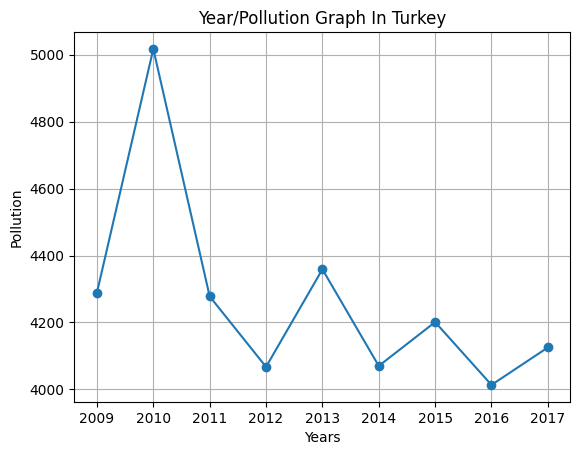

In [152]:
# show the relationship between years and total pollution
years=df['year']
total_pollution=df['pollution']
plt.plot(years,total_pollution,marker='o')
plt.xlabel("Years")
plt.ylabel("Pollution")
plt.title("Year/Pollution Graph In Turkey")
plt.grid(True)
plt.show

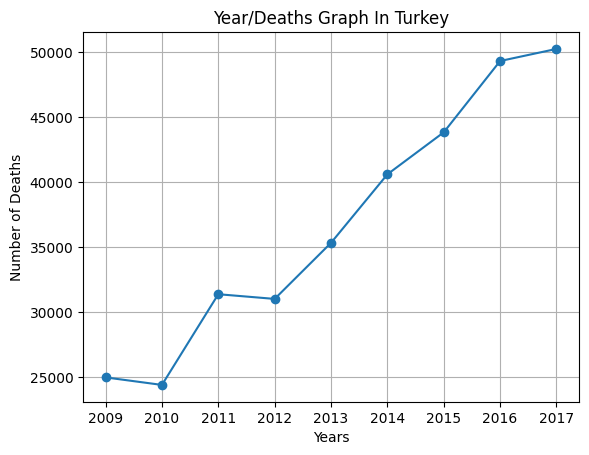

In [153]:
# show the relationship between years and respiratory deaths
Years= [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
Numbers=[]
turkiye_row = selected_df.iloc[0]
i=0
for index in turkiye_row:
   Numbers.append(index)
plt.plot(Years, Numbers, marker='o')
plt.xlabel('Years')
plt.ylabel('Number of Deaths')
plt.title('Year/Deaths Graph In Turkey')
plt.grid(True)
plt.show()

In [154]:
allRatios = []
for i in range(0, 9):
    for j in range(0, 82):
        allRatios.append(selected_df.iloc[j, i] / population_df.iloc[j, i])

index = 0
ratios_2009 = allRatios[index:index + 82]
index += 82
ratios_2010 = allRatios[index:index + 82]
index += 82
ratios_2011 = allRatios[index:index + 82]
index += 82
ratios_2012 = allRatios[index:index + 82]
index += 82
ratios_2013 = allRatios[index:index + 82]
index += 82
ratios_2014 = allRatios[index:index + 82]
index += 82
ratios_2015 = allRatios[index:index + 82]
index += 82
ratios_2016 = allRatios[index:index + 82]
index += 82
ratios_2017 = allRatios[index:index + 82]
index += 82

ratios_df = pd.DataFrame({
    '2009': ratios_2009,
    '2010': ratios_2010,
    '2011': ratios_2011,
    '2012': ratios_2012,
    '2013': ratios_2013,
    '2014': ratios_2014,
    '2015': ratios_2015,
    '2016': ratios_2016,
    '2017': ratios_2017,
})

In [155]:
ratios_df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.000344,0.000331,0.000420,0.000410,0.000461,0.000522,0.000557,0.000618,0.000622
1,0.000223,0.000213,0.000277,0.000267,0.000294,0.000353,0.000411,0.000496,0.000493
2,0.000190,0.000222,0.000281,0.000270,0.000394,0.000395,0.000401,0.000544,0.000515
3,0.000585,0.000596,0.000792,0.000804,0.000710,0.000821,0.000911,0.000910,0.000812
4,0.000177,0.000138,0.000185,0.000161,0.000290,0.000379,0.000371,0.000382,0.000459
...,...,...,...,...,...,...,...,...,...
77,0.000410,0.000393,0.000494,0.000439,0.000618,0.000667,0.000657,0.000869,0.000912
78,0.000668,0.000589,0.000837,0.000751,0.000656,0.000813,0.000819,0.000767,0.000839
79,0.000500,0.000439,0.000651,0.000531,0.000778,0.000637,0.000497,0.000696,0.000675
80,0.000254,0.000236,0.000282,0.000254,0.000353,0.000341,0.000423,0.000419,0.000487


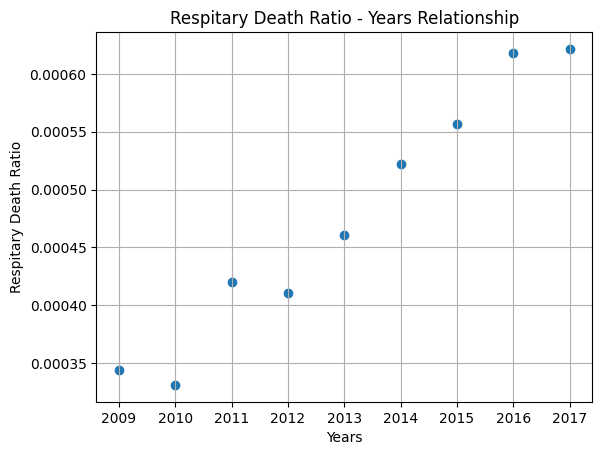

In [156]:
#Check how is death ratio is changing through the years
Turkey_Ratios=[]
for i in range(0,9):
   Turkey_Ratios.append(ratios_df.iloc[0,i])
plt.scatter(Years, Turkey_Ratios)
plt.xlabel('Years')
plt.ylabel('Respitary Death Ratio')
plt.title('Respitary Death Ratio - Years Relationship')
plt.grid(True)
plt.show()



In [157]:
# create df of deaths by only cities
averageRatio=[]
for i in range(0,82):
    num=0
    for j in range(0,9):
        num+=ratios_df.iloc[i,j]
    averageRatio.append(num/9)
deaths_by_cities= selected_df.iloc[1:82]


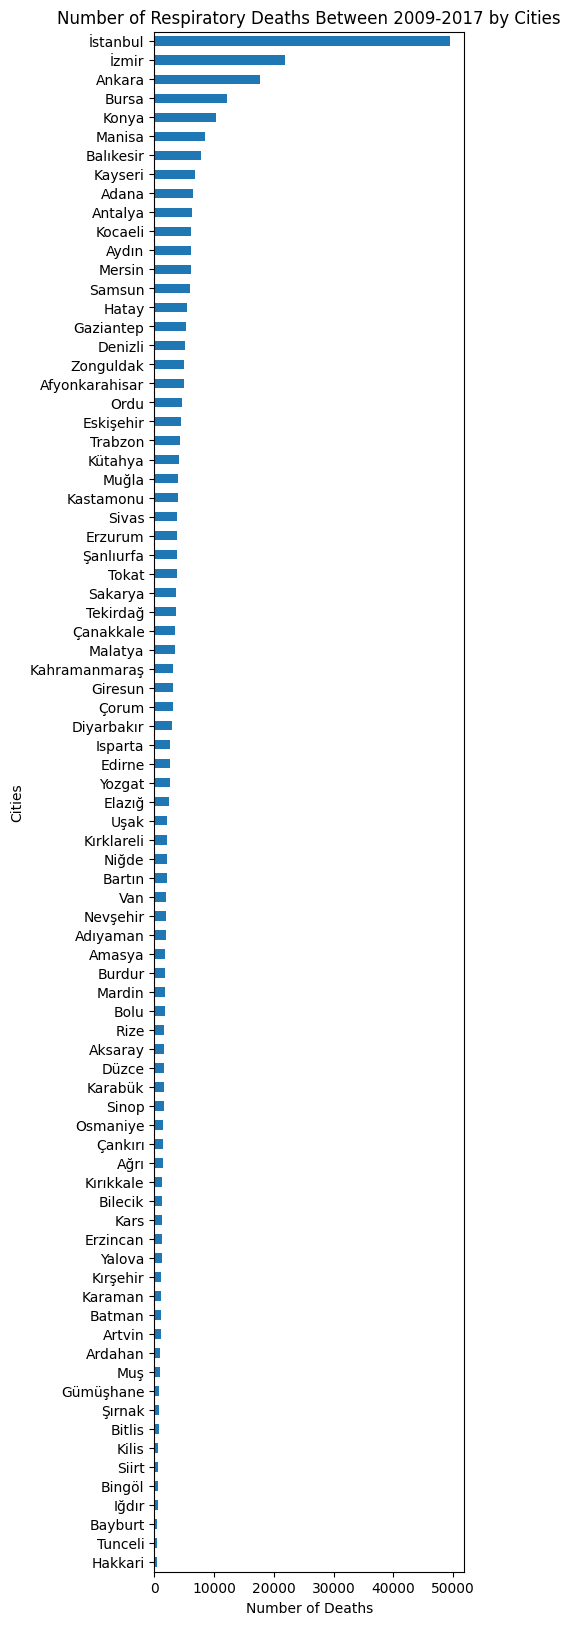

In [149]:
# More detailed data Respitatory Deaths of Cities by ascending order
row_totals = deaths_by_cities.sum(axis=1)
plt.figure(figsize=(4,20))
row_totals.sort_values().plot.barh()
plt.ylabel('Cities')
plt.xlabel('Number of Deaths')
plt.title('Number of Respiratory Deaths Between 2009-2017 by Cities')
plt.show()


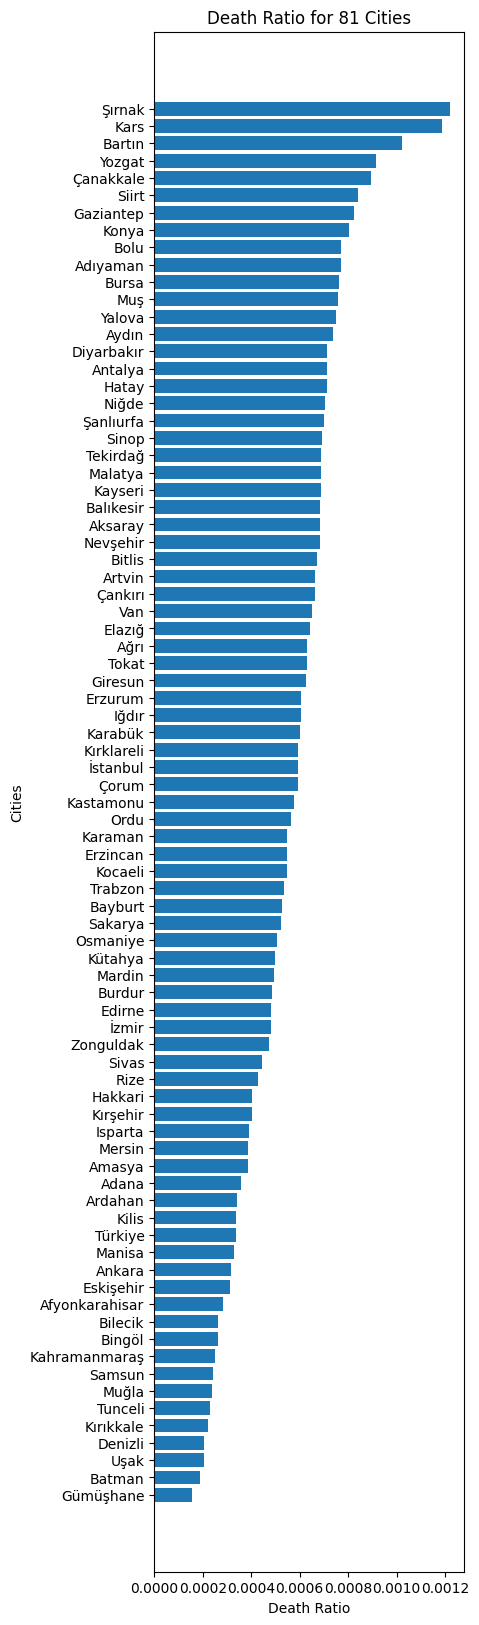

In [158]:
#Show Death Ratios with their corresponding city in ascending order
averageRatioWOTurkey=averageRatio[1:]
sorted_data = sorted(zip(averageRatioWOTurkey, cities), reverse=False)
sorted_ratio, sorted_cities = zip(*sorted_data)

plt.figure(figsize=(4,20))
plt.barh(range(len(sorted_cities)), sorted_ratio, align='center')
plt.yticks(range(len(sorted_cities)), sorted_cities)
plt.xlabel('Death Ratio')
plt.ylabel('Cities')
plt.title('Death Ratio for 81 Cities')

plt.show()

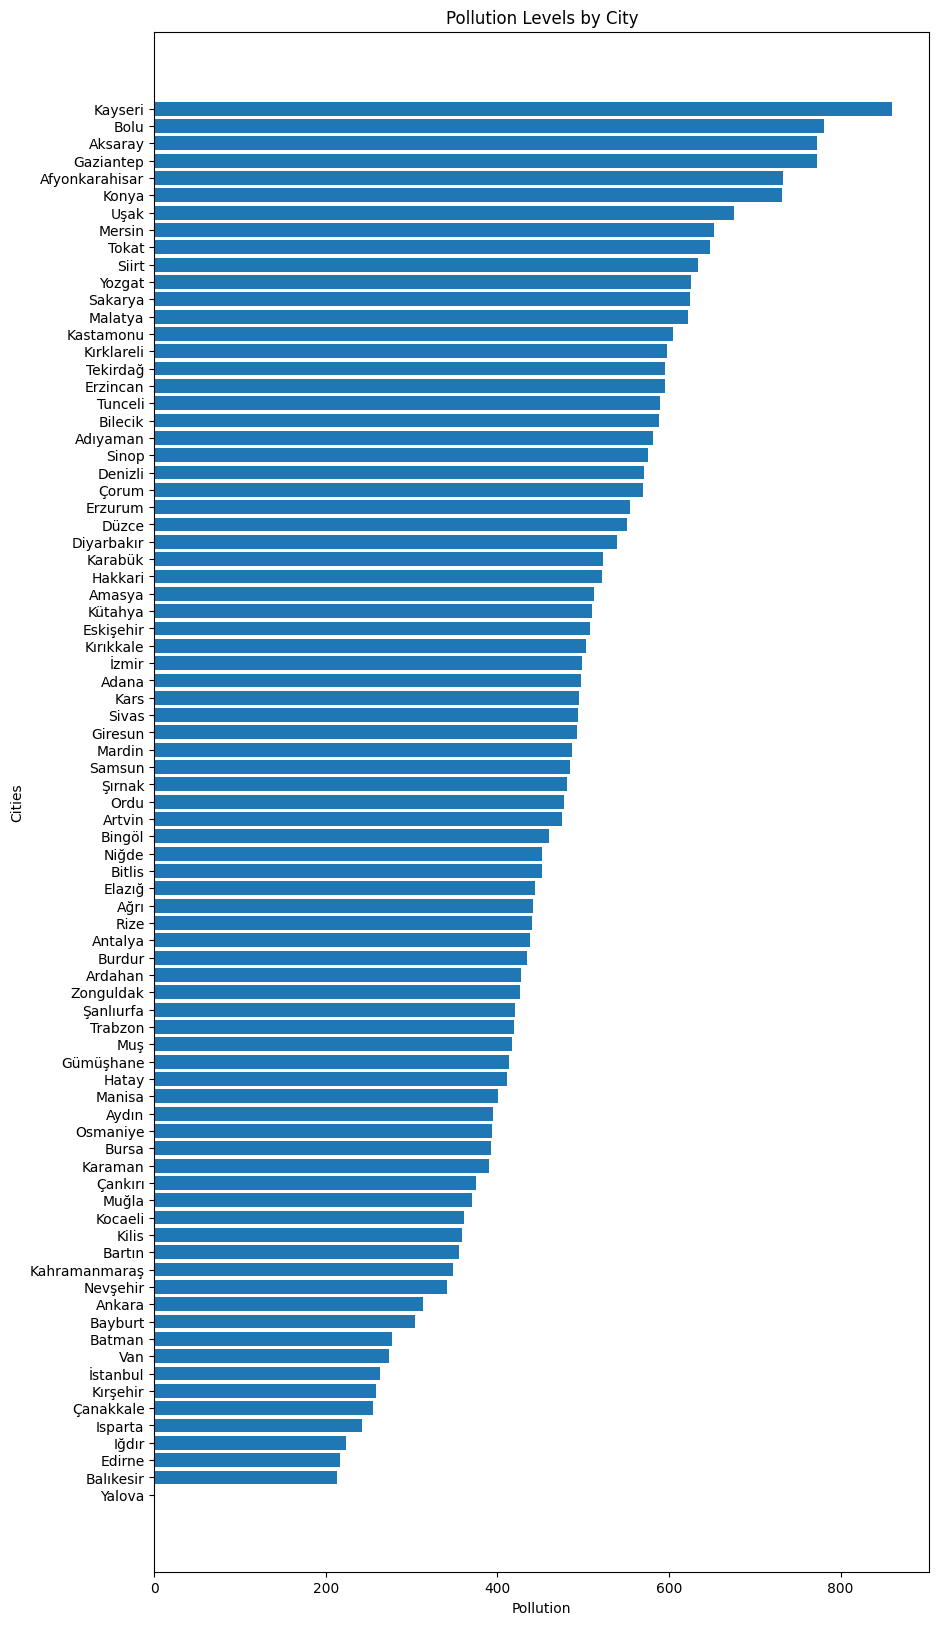

In [159]:
# More detailed data Pollution Levels of Cities by ascending order
df_sorted = df2.sort_values(by='pollution', ascending=True)
plt.figure(figsize=(10, 20))
plt.barh(df_sorted['cities'], df_sorted['pollution'])
plt.xlabel('Pollution')
plt.ylabel('Cities')
plt.title('Pollution Levels by City')
plt.show()

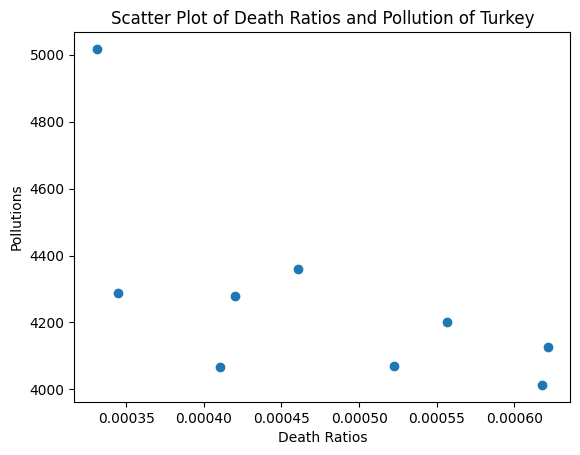

In [169]:
#Show the correlation between ratios and pollution
mylist=ratios_df.iloc[0,].tolist()
mylist
plt.scatter(mylist, df['pollution'])
plt.xlabel('Death Ratios')
plt.ylabel('Pollutions')
plt.title('Scatter Plot of Death Ratios and Pollution of Turkey')

plt.show()



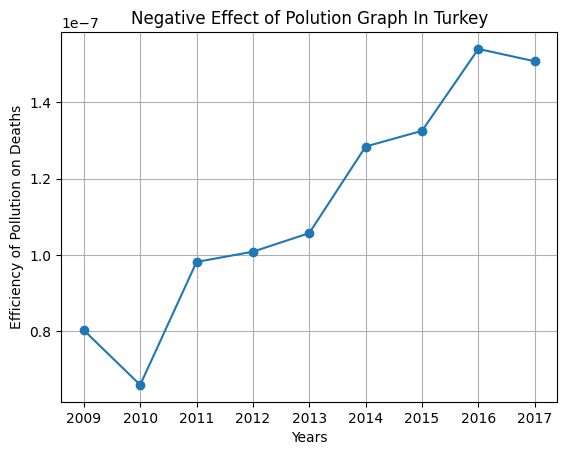

In [170]:
# How is the effect of pollution is changing on deadly scale through years in turkey
efficiency=[]
for i in range(0,9):
    efficiency.append(mylist[i]/df['pollution'][i])

plt.plot(Years, efficiency, marker='o')
plt.xlabel('Years')
plt.ylabel('Efficiency of Pollution on Deaths')
plt.title('Negative Effect of Polution Graph In Turkey')
plt.grid(True)
plt.show()
    